# Health Care Analytics

### Abstract: 

### To predict the patient length of Stay into the hospital based on Patient health details and Hospital details.

##### It is a classification problem where Stay is target variable and it is updated to predict whether the patient will be in hospital for:
##### 0 - 20 days 
##### 21-30 days
##### 31-60 days
##### 60+ days


### Why solving the problem is useful ?
#### Because due to COVID pandemic Health care management is most overlooked. 
<br><b>1:</b> So purpose of solving this problem will help as patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.</br>
<br><b>2:</b> This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to minimize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning</br>
<br><b>3:</b> The task is to Aaccurately predict the Length of Stay for each patient on a case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning.</br>

# From where could you get dataset ?

<b> Dataset Link: https://www.kaggle.com/vin1234/janatahack-healthcare-analytics-ii </b>

# Explanation of the dataset

#### So dataset has total 318438 records of patients along with 18 features(17 independent features and 1 target feature Stay)

#### Explaining each feature

<br><b>1: case_id = Case ID with which patient was registered in the hospital </b></br>
<br><b>2: Hospital_code = Unique code for Hospital(category)</b></br>
<br><b>3: Hospital_type_code =  Unique code for type of Hospital(category)</b></br>
<br><b>4: City_Code_Hospital =  Unique city code for each Hospital(category)</b></br>  
<br><b>5: Hospital_region_code =  Region code for each of Hospital(category)</b></br>
<br><b>6: Available Extra Rooms in Hospital = Extra Rooms available each of Hospital(integer)</b></br>
<br><b>7: Department = Department overlooking the case(category)</b></br>
<br><b>8: Ward_Type = Ward type overlooking the case(category)</b></br>
<br><b>9: Ward_Facility_Code = Ward Facility code given to each ward(category)</b></br>
<br><b>10: Bed Grade = Condition of Bed in the Ward in the Hospital(category)</b></br>
<br><b>11: patientid =Unique Patient Id</b></br>
<br><b>12: City_Code_Patient =  Unique city code for each Patient(category)</b></br>    
<br><b>13: Type of Admission =  Admission Type registered by the Hospital(category)</b></br>   
<br><b>14: Severity of Illness =  Severity of the illness recorded at the time of admission(category)</b></br>
<br><b>15: Visitors with Patient=  Number of Visitors with the patient(integer)</b></br>   
<br><b>16: Age=  Age of the patient(category)(in range 21-30,11-20)</b></br> 
<br><b>17: Admission_Deposit=  Deposit at the Admission Time(integer)</b></br> 
<br><b>18: Stay= Length of days patient stayed in the hospital (category)(in range 0-10,10-20,21-30 so on)</b></br> 

# Changing the Stay into 4 category
<br><b>0-20 days Stay </b></br>
<br><b>21-30 days Stay </b></br>
<br><b>31-60 days Stay </b></br>
<br><b>61+ days Stay </b></br>



# Using 3 Machine Learning Models
<br><b>1:Random Forest</b></br>
<br><b>2:Logistic Regression</b></br>
<br><b>3:Decision Tree</b></br>

# How I am preventing overfitting ?
### Random Forest
<br>Using suitable maximum depth of the tree which is computed from Hyper parameter Tuning I am trying to prevent overfitting.</br>
<br> If the maximum depth is too high then overfitting and so selecting appropriate maximum depth </br>

### Logistic Regression
<br>Using Regularization term we can prevent overfitting here. Hyperparameter C=1/lambda </br>
<br> Equation of Logistic Regression is</br>
<br>argmin(w,b)log loss term + lambda*(Regularization(l1,l2 or elastic net))</br>
<br>if lambda is high then more focus on regularization term (which tries to reduce weights) and so more errors(because less focus on minimizing log loss term) hence underfitting</br>
<br>If lambda is low more focus on log loss term hence error will be less and hence overfitting.</br>
<br> So selecting C value is important to prevent overfitting</br>

### Decision Tree
<br>Using suitable maximum depth of the tree which is computed from Hyper parameter Tuning I am trying to prevent overfitting.</br>
<br> If the maximum depth is too high then overfitting and so selecting appropriate maximum depth </br>

# List of libraries used
#### Pandas
#### Numpy
#### Matplotlib.pyplot
#### Seaborn
#### Label Encoding sklearn.preprocessing
#### StandardScaler sklearn.preprocessing
#### Random Forest sklearn.ensemble
#### import operator
#### Train Test split (sklearn)
#### Accuracy (sklearn.metrics)
#### RandomizedSearchCV (sklearn.model_selection)
#### Random integer(from scipy.stats import randint)
#### Confusion Matrix (sklearn.metrics)
#### Plot confusion Matrix ( from sklearn.metrics import plot_confusion_matrix)
#### Variation Inflation Factor (VIF) ( from statsmodels.stats.outliers_influence import variance_inflation_factor)
#### Logistic Regression
#### Decision Tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('C:/Users/shwer/data/train.csv')
data.head(8)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50


In [4]:
data.shape

(318438, 18)

In [5]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [6]:
# Combining 0-10 and 10-20 into one as 0-20

In [7]:
def combine(dataframe,column_to_change,new_column):
    dataframe.replace(column_to_change,new_column,inplace=True)
    return dataframe

In [8]:
combine(data['Stay'],['0-10','11-20'],'0-20')

0          0-20
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433     0-20
318434    31-40
318435     0-20
318436     0-20
318437     0-20
Name: Stay, Length: 318438, dtype: object

In [9]:
# Checking 0-10 and 10-20 combined into 0-20
data['Stay'].value_counts()

0-20                  101743
21-30                  87491
31-40                  55159
51-60                  35018
41-50                  11743
71-80                  10254
More than 100 Days      6683
81-90                   4838
91-100                  2765
61-70                   2744
Name: Stay, dtype: int64

In [10]:
combine(data['Stay'],['31-40','41-50','51-60'],'31-60')

0          0-20
1         31-60
2         31-60
3         31-60
4         31-60
          ...  
318433     0-20
318434    31-60
318435     0-20
318436     0-20
318437     0-20
Name: Stay, Length: 318438, dtype: object

In [11]:
# Checking 31-40,41-50 and 51-60 combined into 3
data['Stay'].value_counts()

31-60                 101920
0-20                  101743
21-30                  87491
71-80                  10254
More than 100 Days      6683
81-90                   4838
91-100                  2765
61-70                   2744
Name: Stay, dtype: int64

In [12]:
combine(data['Stay'],['61-70','71-80','81-90','91-100','More than 100 Days'],'60+')

0          0-20
1         31-60
2         31-60
3         31-60
4         31-60
          ...  
318433     0-20
318434    31-60
318435     0-20
318436     0-20
318437     0-20
Name: Stay, Length: 318438, dtype: object

In [13]:
# Checking rest into 60+ days stay
data['Stay'].value_counts()

31-60    101920
0-20     101743
21-30     87491
60+       27284
Name: Stay, dtype: int64

In [14]:
# As every target category has different sets of records performing downsampling
label=data['Stay']

g = data.groupby(label, group_keys=False)
data = pd.DataFrame(g.apply(lambda x: 
x.sample(g.size().min()).
reset_index(drop=True)))
data['Stay'].value_counts()

0-20     27284
60+      27284
31-60    27284
21-30    27284
Name: Stay, dtype: int64

In [15]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,190418,15,c,5,Z,3,gynecology,Q,F,3.0,40733,21.0,Urgent,Minor,3,71-80,3925.0,0-20
1,162579,8,c,3,Z,4,gynecology,Q,F,2.0,109174,NaN,Emergency,Moderate,2,41-50,3649.0,0-20
2,39317,11,b,2,Y,5,gynecology,Q,D,1.0,96994,1.0,Emergency,Extreme,4,41-50,6124.0,0-20
3,48301,1,d,10,Y,4,gynecology,R,B,2.0,73176,4.0,Emergency,Moderate,3,51-60,5044.0,0-20
4,202732,23,a,6,X,4,radiotherapy,Q,F,1.0,2835,2.0,Trauma,Minor,2,71-80,5456.0,0-20


In [16]:
# Checking Hospital_type_code column different types
# Reference: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
def column_category(dataframe):
    a=dataframe.value_counts().rename_axis('unique_values').to_frame('counts')
    return a


In [17]:
column_category(data['Hospital_code'])

,counts
unique_values,
26,12284
23,9126
19,6929
6,6861
28,5959
11,5855
14,5681
27,4484
29,4126


In [18]:
# As it has many category we will decide to drop it and writing a function of it
def dropping_columns(dataframe,column_to_drop):
    dataframe.drop([column_to_drop],axis=1,inplace=True)
    return dataframe

In [19]:
dropping_columns(data,'Hospital_code')

,case_id,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,190418,c,5,Z,3,gynecology,Q,F,3.0,40733,21.0,Urgent,Minor,3,71-80,3925.0,0-20
1,162579,c,3,Z,4,gynecology,Q,F,2.0,109174,NaN,Emergency,Moderate,2,41-50,3649.0,0-20
2,39317,b,2,Y,5,gynecology,Q,D,1.0,96994,1.0,Emergency,Extreme,4,41-50,6124.0,0-20
3,48301,d,10,Y,4,gynecology,R,B,2.0,73176,4.0,Emergency,Moderate,3,51-60,5044.0,0-20
4,202732,a,6,X,4,radiotherapy,Q,F,1.0,2835,2.0,Trauma,Minor,2,71-80,5456.0,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,c,3,Z,2,gynecology,S,A,2.0,104992,5.0,Emergency,Moderate,4,61-70,4562.0,60+
27280,101660,d,10,Y,3,gynecology,R,B,3.0,330,8.0,Emergency,Minor,5,81-90,3767.0,60+
27281,224618,e,1,X,2,gynecology,S,E,3.0,30040,7.0,Trauma,Moderate,8,21-30,4967.0,60+
27282,192308,d,5,Z,3,gynecology,S,F,2.0,92461,5.0,Urgent,Moderate,3,41-50,3891.0,60+


In [20]:
# Checking null values
data.isnull().sum()

case_id                                 0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              39
patientid                               0
City_Code_Patient                    1571
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [21]:
# As only 43 records are null we will drop that
data = data.dropna(axis=0, subset=['Bed Grade'])
data.isnull().sum()

case_id                                 0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    1571
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [22]:
# As City_Code_Patient is category column and has many categories we will drop that column so need to deal with null values for this column
column_category(data['City_Code_Patient'])

,counts
unique_values,
8.0,43531
2.0,12841
1.0,8851
7.0,8172
5.0,7011
4.0,5166
9.0,4005
15.0,3135
10.0,2601


In [23]:
dropping_columns(data,'City_Code_Patient')

,case_id,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,190418,c,5,Z,3,gynecology,Q,F,3.0,40733,Urgent,Minor,3,71-80,3925.0,0-20
1,162579,c,3,Z,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,2,41-50,3649.0,0-20
2,39317,b,2,Y,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,4,41-50,6124.0,0-20
3,48301,d,10,Y,4,gynecology,R,B,2.0,73176,Emergency,Moderate,3,51-60,5044.0,0-20
4,202732,a,6,X,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,2,71-80,5456.0,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,c,3,Z,2,gynecology,S,A,2.0,104992,Emergency,Moderate,4,61-70,4562.0,60+
27280,101660,d,10,Y,3,gynecology,R,B,3.0,330,Emergency,Minor,5,81-90,3767.0,60+
27281,224618,e,1,X,2,gynecology,S,E,3.0,30040,Trauma,Moderate,8,21-30,4967.0,60+
27282,192308,d,5,Z,3,gynecology,S,F,2.0,92461,Urgent,Moderate,3,41-50,3891.0,60+


In [24]:
# Checking categories of column Hospital_type_code
column_category(data['Hospital_type_code'])

,counts
unique_values,
a,47420
b,24632
c,15951
e,8569
d,7135
f,3842
g,1548


In [25]:
# Combining d,e,f,g categories as Others 
combine(data['Hospital_type_code'],['d','e','f','g'],'Others')

0             c
1             c
2             b
3        Others
4             a
          ...  
27279         c
27280    Others
27281    Others
27282    Others
27283         b
Name: Hospital_type_code, Length: 109097, dtype: object

In [26]:
column_category(data['Hospital_type_code'])

,counts
unique_values,
a,47420
b,24632
Others,21094
c,15951


In [27]:
# Converting categorical column into numerical using Dummies and writing a function for it
def dummy_variables(dataframe,column_name):
    dataframe=pd.get_dummies(dataframe, prefix=[column_name], columns=[column_name])
    return dataframe


In [28]:
data=dummy_variables(data,'Hospital_type_code')


In [29]:
data.head()

,case_id,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_Others,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c
0,190418,5,Z,3,gynecology,Q,F,3.0,40733,Urgent,Minor,3,71-80,3925.0,0-20,0,0,0,1
1,162579,3,Z,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,2,41-50,3649.0,0-20,0,0,0,1
2,39317,2,Y,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,4,41-50,6124.0,0-20,0,0,1,0
3,48301,10,Y,4,gynecology,R,B,2.0,73176,Emergency,Moderate,3,51-60,5044.0,0-20,1,0,0,0
4,202732,6,X,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,2,71-80,5456.0,0-20,0,1,0,0


In [30]:
# As to avoid dummy trap we will delete one dummy variable created keeping base variable and using a function to write it
def dummy_trap(dataframe,column_name_to_drop):
    dataframe.drop([column_name_to_drop], axis = 1,inplace=True) 
    return dataframe


In [31]:
dummy_trap(data,'Hospital_type_code_Others')

,case_id,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c
0,190418,5,Z,3,gynecology,Q,F,3.0,40733,Urgent,Minor,3,71-80,3925.0,0-20,0,0,1
1,162579,3,Z,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,2,41-50,3649.0,0-20,0,0,1
2,39317,2,Y,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,4,41-50,6124.0,0-20,0,1,0
3,48301,10,Y,4,gynecology,R,B,2.0,73176,Emergency,Moderate,3,51-60,5044.0,0-20,0,0,0
4,202732,6,X,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,2,71-80,5456.0,0-20,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,3,Z,2,gynecology,S,A,2.0,104992,Emergency,Moderate,4,61-70,4562.0,60+,0,0,1
27280,101660,10,Y,3,gynecology,R,B,3.0,330,Emergency,Minor,5,81-90,3767.0,60+,0,0,0
27281,224618,1,X,2,gynecology,S,E,3.0,30040,Trauma,Moderate,8,21-30,4967.0,60+,0,0,0
27282,192308,5,Z,3,gynecology,S,F,2.0,92461,Urgent,Moderate,3,41-50,3891.0,60+,0,0,0


In [32]:
# Checking City_Code_Hospital category
column_category(data['City_Code_Hospital'])

,counts
unique_values,
2,18673
1,18439
6,15948
7,11413
3,10876
5,10661
9,9036
11,5959
4,4877


In [33]:
# Combining category 11,4,10,13 as Other category
combine(data['City_Code_Hospital'],[11,4,10,13],'Others')

0             5
1             3
2             2
3        Others
4             6
          ...  
27279         3
27280    Others
27281         1
27282         5
27283         2
Name: City_Code_Hospital, Length: 109097, dtype: object

In [34]:
column_category(data['City_Code_Hospital'])

,counts
unique_values,
2,18673
1,18439
6,15948
Others,14051
7,11413
3,10876
5,10661
9,9036


In [35]:
# Creating dummies 
data=dummy_variables(data,'City_Code_Hospital')

In [36]:
data.head()

,case_id,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,...,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,City_Code_Hospital_Others
0,190418,Z,3,gynecology,Q,F,3.0,40733,Urgent,Minor,...,0,1,0,0,0,1,0,0,0,0
1,162579,Z,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,...,0,1,0,0,1,0,0,0,0,0
2,39317,Y,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,...,1,0,0,1,0,0,0,0,0,0
3,48301,Y,4,gynecology,R,B,2.0,73176,Emergency,Moderate,...,0,0,0,0,0,0,0,0,0,1
4,202732,X,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,...,0,0,0,0,0,0,1,0,0,0


In [37]:
dummy_trap(data,'City_Code_Hospital_Others')

,case_id,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,...,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9
0,190418,Z,3,gynecology,Q,F,3.0,40733,Urgent,Minor,...,0,0,1,0,0,0,1,0,0,0
1,162579,Z,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,...,0,0,1,0,0,1,0,0,0,0
2,39317,Y,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,...,0,1,0,0,1,0,0,0,0,0
3,48301,Y,4,gynecology,R,B,2.0,73176,Emergency,Moderate,...,0,0,0,0,0,0,0,0,0,0
4,202732,X,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,Z,2,gynecology,S,A,2.0,104992,Emergency,Moderate,...,0,0,1,0,0,1,0,0,0,0
27280,101660,Y,3,gynecology,R,B,3.0,330,Emergency,Minor,...,0,0,0,0,0,0,0,0,0,0
27281,224618,X,2,gynecology,S,E,3.0,30040,Trauma,Moderate,...,0,0,0,1,0,0,0,0,0,0
27282,192308,Z,3,gynecology,S,F,2.0,92461,Urgent,Moderate,...,0,0,0,0,0,0,1,0,0,0


In [38]:
column_category(data['Hospital_region_code'])

,counts
unique_values,
X,45223
Y,42337
Z,21537


In [39]:
# Creating dummies 
data=dummy_variables(data,'Hospital_region_code')

In [40]:
data.head()

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,...,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z
0,190418,3,gynecology,Q,F,3.0,40733,Urgent,Minor,3,...,0,0,0,1,0,0,0,0,0,1
1,162579,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,2,...,0,0,1,0,0,0,0,0,0,1
2,39317,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,4,...,0,1,0,0,0,0,0,0,1,0
3,48301,4,gynecology,R,B,2.0,73176,Emergency,Moderate,3,...,0,0,0,0,0,0,0,0,1,0
4,202732,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,2,...,0,0,0,0,1,0,0,1,0,0


In [41]:
dummy_trap(data,'Hospital_region_code_Z')

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,...,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y
0,190418,3,gynecology,Q,F,3.0,40733,Urgent,Minor,3,...,1,0,0,0,1,0,0,0,0,0
1,162579,4,gynecology,Q,F,2.0,109174,Emergency,Moderate,2,...,1,0,0,1,0,0,0,0,0,0
2,39317,5,gynecology,Q,D,1.0,96994,Emergency,Extreme,4,...,0,0,1,0,0,0,0,0,0,1
3,48301,4,gynecology,R,B,2.0,73176,Emergency,Moderate,3,...,0,0,0,0,0,0,0,0,0,1
4,202732,4,radiotherapy,Q,F,1.0,2835,Trauma,Minor,2,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,gynecology,S,A,2.0,104992,Emergency,Moderate,4,...,1,0,0,1,0,0,0,0,0,0
27280,101660,3,gynecology,R,B,3.0,330,Emergency,Minor,5,...,0,0,0,0,0,0,0,0,0,1
27281,224618,2,gynecology,S,E,3.0,30040,Trauma,Moderate,8,...,0,1,0,0,0,0,0,0,1,0
27282,192308,3,gynecology,S,F,2.0,92461,Urgent,Moderate,3,...,0,0,0,0,1,0,0,0,0,0


In [42]:
column_category(data['Department'])

,counts
unique_values,
gynecology,85261
radiotherapy,10206
anesthesia,9907
TB & Chest disease,3235
surgery,488


In [43]:
combine(data['Department'],['TB & Chest disease','surgery'],'Others')

0          gynecology
1          gynecology
2          gynecology
3          gynecology
4        radiotherapy
             ...     
27279      gynecology
27280      gynecology
27281      gynecology
27282      gynecology
27283      gynecology
Name: Department, Length: 109097, dtype: object

In [44]:
# Combining TB and Chest diesease and surgery as Others for Department
column_category(data['Department'])

,counts
unique_values,
gynecology,85261
radiotherapy,10206
anesthesia,9907
Others,3723


In [45]:
# Creating dummies 
data=dummy_variables(data,'Department')

In [46]:
data.head()

,case_id,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_Others,Department_anesthesia,Department_gynecology,Department_radiotherapy
0,190418,3,Q,F,3.0,40733,Urgent,Minor,3,71-80,...,1,0,0,0,0,0,0,0,1,0
1,162579,4,Q,F,2.0,109174,Emergency,Moderate,2,41-50,...,0,0,0,0,0,0,0,0,1,0
2,39317,5,Q,D,1.0,96994,Emergency,Extreme,4,41-50,...,0,0,0,0,0,1,0,0,1,0
3,48301,4,R,B,2.0,73176,Emergency,Moderate,3,51-60,...,0,0,0,0,0,1,0,0,1,0
4,202732,4,Q,F,1.0,2835,Trauma,Minor,2,71-80,...,0,1,0,0,1,0,0,0,0,1


In [47]:
dummy_trap(data,'Department_Others')

,case_id,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,City_Code_Hospital_3,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_anesthesia,Department_gynecology,Department_radiotherapy
0,190418,3,Q,F,3.0,40733,Urgent,Minor,3,71-80,...,0,1,0,0,0,0,0,0,1,0
1,162579,4,Q,F,2.0,109174,Emergency,Moderate,2,41-50,...,1,0,0,0,0,0,0,0,1,0
2,39317,5,Q,D,1.0,96994,Emergency,Extreme,4,41-50,...,0,0,0,0,0,0,1,0,1,0
3,48301,4,R,B,2.0,73176,Emergency,Moderate,3,51-60,...,0,0,0,0,0,0,1,0,1,0
4,202732,4,Q,F,1.0,2835,Trauma,Minor,2,71-80,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,S,A,2.0,104992,Emergency,Moderate,4,61-70,...,1,0,0,0,0,0,0,0,1,0
27280,101660,3,R,B,3.0,330,Emergency,Minor,5,81-90,...,0,0,0,0,0,0,1,0,1,0
27281,224618,2,S,E,3.0,30040,Trauma,Moderate,8,21-30,...,0,0,0,0,0,1,0,0,1,0
27282,192308,3,S,F,2.0,92461,Urgent,Moderate,3,41-50,...,0,1,0,0,0,0,0,0,1,0


In [48]:
column_category(data['Ward_Type'])

,counts
unique_values,
R,43447
Q,33812
S,29780
P,1540
T,516
U,2


In [49]:
combine(data['Ward_Type'],['P','T','U'],'Others')

0        Q
1        Q
2        Q
3        R
4        Q
        ..
27279    S
27280    R
27281    S
27282    S
27283    S
Name: Ward_Type, Length: 109097, dtype: object

In [50]:
column_category(data['Ward_Type'])

,counts
unique_values,
R,43447
Q,33812
S,29780
Others,2058


In [51]:
# Creating dummies 
data=dummy_variables(data,'Ward_Type')

In [52]:
data.head()

,case_id,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,...,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Others,Ward_Type_Q,Ward_Type_R,Ward_Type_S
0,190418,3,F,3.0,40733,Urgent,Minor,3,71-80,3925.0,...,0,0,0,0,1,0,0,1,0,0
1,162579,4,F,2.0,109174,Emergency,Moderate,2,41-50,3649.0,...,0,0,0,0,1,0,0,1,0,0
2,39317,5,D,1.0,96994,Emergency,Extreme,4,41-50,6124.0,...,0,0,1,0,1,0,0,1,0,0
3,48301,4,B,2.0,73176,Emergency,Moderate,3,51-60,5044.0,...,0,0,1,0,1,0,0,0,1,0
4,202732,4,F,1.0,2835,Trauma,Minor,2,71-80,5456.0,...,0,1,0,0,0,1,0,1,0,0


In [53]:
dummy_trap(data,'Ward_Type_Others')

,case_id,Available Extra Rooms in Hospital,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,...,City_Code_Hospital_7,City_Code_Hospital_9,Hospital_region_code_X,Hospital_region_code_Y,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S
0,190418,3,F,3.0,40733,Urgent,Minor,3,71-80,3925.0,...,0,0,0,0,0,1,0,1,0,0
1,162579,4,F,2.0,109174,Emergency,Moderate,2,41-50,3649.0,...,0,0,0,0,0,1,0,1,0,0
2,39317,5,D,1.0,96994,Emergency,Extreme,4,41-50,6124.0,...,0,0,0,1,0,1,0,1,0,0
3,48301,4,B,2.0,73176,Emergency,Moderate,3,51-60,5044.0,...,0,0,0,1,0,1,0,0,1,0
4,202732,4,F,1.0,2835,Trauma,Minor,2,71-80,5456.0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,A,2.0,104992,Emergency,Moderate,4,61-70,4562.0,...,0,0,0,0,0,1,0,0,0,1
27280,101660,3,B,3.0,330,Emergency,Minor,5,81-90,3767.0,...,0,0,0,1,0,1,0,0,1,0
27281,224618,2,E,3.0,30040,Trauma,Moderate,8,21-30,4967.0,...,0,0,1,0,0,1,0,0,0,1
27282,192308,3,F,2.0,92461,Urgent,Moderate,3,41-50,3891.0,...,0,0,0,0,0,1,0,0,0,1


In [54]:
column_category(data['Ward_Facility_Code'])

,counts
unique_values,
F,38619
D,18673
E,18439
B,12251
C,11413
A,9702


In [55]:
# Creating dummies 
data=dummy_variables(data,'Ward_Facility_Code')

In [56]:
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,190418,3,3.0,40733,Urgent,Minor,3,71-80,3925.0,0-20,...,0,1,0,0,0,0,0,0,0,1
1,162579,4,2.0,109174,Emergency,Moderate,2,41-50,3649.0,0-20,...,0,1,0,0,0,0,0,0,0,1
2,39317,5,1.0,96994,Emergency,Extreme,4,41-50,6124.0,0-20,...,0,1,0,0,0,0,0,1,0,0
3,48301,4,2.0,73176,Emergency,Moderate,3,51-60,5044.0,0-20,...,0,0,1,0,0,1,0,0,0,0
4,202732,4,1.0,2835,Trauma,Minor,2,71-80,5456.0,0-20,...,1,1,0,0,0,0,0,0,0,1


In [57]:
dummy_trap(data,'Ward_Facility_Code_A')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,190418,3,3.0,40733,Urgent,Minor,3,71-80,3925.0,0-20,...,1,0,1,0,0,0,0,0,0,1
1,162579,4,2.0,109174,Emergency,Moderate,2,41-50,3649.0,0-20,...,1,0,1,0,0,0,0,0,0,1
2,39317,5,1.0,96994,Emergency,Extreme,4,41-50,6124.0,0-20,...,1,0,1,0,0,0,0,1,0,0
3,48301,4,2.0,73176,Emergency,Moderate,3,51-60,5044.0,0-20,...,1,0,0,1,0,1,0,0,0,0
4,202732,4,1.0,2835,Trauma,Minor,2,71-80,5456.0,0-20,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,2.0,104992,Emergency,Moderate,4,61-70,4562.0,60+,...,1,0,0,0,1,0,0,0,0,0
27280,101660,3,3.0,330,Emergency,Minor,5,81-90,3767.0,60+,...,1,0,0,1,0,1,0,0,0,0
27281,224618,2,3.0,30040,Trauma,Moderate,8,21-30,4967.0,60+,...,1,0,0,0,1,0,0,0,1,0
27282,192308,3,2.0,92461,Urgent,Moderate,3,41-50,3891.0,60+,...,1,0,0,0,1,0,0,0,0,1


In [58]:
column_category(data['Bed Grade'])

,counts
unique_values,
2.0,41140
3.0,38203
4.0,20455
1.0,9299


In [59]:
# As it is having logical order i.e use label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Bed Grade']=le.fit_transform(data['Bed Grade'])
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,...,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,190418,3,2,40733,Urgent,Minor,3,71-80,3925.0,0-20,...,1,0,1,0,0,0,0,0,0,1
1,162579,4,1,109174,Emergency,Moderate,2,41-50,3649.0,0-20,...,1,0,1,0,0,0,0,0,0,1
2,39317,5,0,96994,Emergency,Extreme,4,41-50,6124.0,0-20,...,1,0,1,0,0,0,0,1,0,0
3,48301,4,1,73176,Emergency,Moderate,3,51-60,5044.0,0-20,...,1,0,0,1,0,1,0,0,0,0
4,202732,4,0,2835,Trauma,Minor,2,71-80,5456.0,0-20,...,0,1,1,0,0,0,0,0,0,1


In [60]:
column_category(data['Type of Admission'])

,counts
unique_values,
Trauma,53464
Emergency,39619
Urgent,16014


In [61]:
# As Emergency and Urgent is same combining them 
combine(data['Type of Admission'],['Emergency','Urgent'],'Urgent_Situation')

0        Urgent_Situation
1        Urgent_Situation
2        Urgent_Situation
3        Urgent_Situation
4                  Trauma
               ...       
27279    Urgent_Situation
27280    Urgent_Situation
27281              Trauma
27282    Urgent_Situation
27283              Trauma
Name: Type of Admission, Length: 109097, dtype: object

In [62]:
# Creating dummies 
data=dummy_variables(data,'Type of Admission')

In [63]:
dummy_trap(data,'Type of Admission_Trauma')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,...,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation
0,190418,3,2,40733,Minor,3,71-80,3925.0,0-20,0,...,0,1,0,0,0,0,0,0,1,1
1,162579,4,1,109174,Moderate,2,41-50,3649.0,0-20,0,...,0,1,0,0,0,0,0,0,1,1
2,39317,5,0,96994,Extreme,4,41-50,6124.0,0-20,0,...,0,1,0,0,0,0,1,0,0,1
3,48301,4,1,73176,Moderate,3,51-60,5044.0,0-20,0,...,0,0,1,0,1,0,0,0,0,1
4,202732,4,0,2835,Minor,2,71-80,5456.0,0-20,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,1,104992,Moderate,4,61-70,4562.0,60+,0,...,0,0,0,1,0,0,0,0,0,1
27280,101660,3,2,330,Minor,5,81-90,3767.0,60+,0,...,0,0,1,0,1,0,0,0,0,1
27281,224618,2,2,30040,Moderate,8,21-30,4967.0,60+,0,...,0,0,0,1,0,0,0,1,0,0
27282,192308,3,1,92461,Moderate,3,41-50,3891.0,60+,0,...,0,0,0,1,0,0,0,0,1,1


In [64]:
column_category(data['Severity of Illness'])

,counts
unique_values,
Moderate,60504
Minor,27520
Extreme,21073


In [69]:
# Creating a column where Minor=0,Moderate=1 and Extreme=2
# Reference: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# create a list of our conditions
conditions=[
    (data['Severity of Illness']=='Minor'),
    (data['Severity of Illness']=='Moderate'),
    (data['Severity of Illness']=='Extreme')
]

# create a list of the values we want to assign for each condition
values=[0,1,2]
# create a new column and use np.select to assign values to it using our lists as arguments
data['Severity']=np.select(conditions,values)

data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity
0,190418,3,2,40733,Minor,3,71-80,3925.0,0-20,0,...,1,0,0,0,0,0,0,1,1,0
1,162579,4,1,109174,Moderate,2,41-50,3649.0,0-20,0,...,1,0,0,0,0,0,0,1,1,1
2,39317,5,0,96994,Extreme,4,41-50,6124.0,0-20,0,...,1,0,0,0,0,1,0,0,1,2
3,48301,4,1,73176,Moderate,3,51-60,5044.0,0-20,0,...,0,1,0,1,0,0,0,0,1,1
4,202732,4,0,2835,Minor,2,71-80,5456.0,0-20,1,...,1,0,0,0,0,0,0,1,0,0


In [70]:
# Dropping column Severity of Illness
dropping_columns(data,'Severity of Illness')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity
0,190418,3,2,40733,3,71-80,3925.0,0-20,0,0,...,1,0,0,0,0,0,0,1,1,0
1,162579,4,1,109174,2,41-50,3649.0,0-20,0,0,...,1,0,0,0,0,0,0,1,1,1
2,39317,5,0,96994,4,41-50,6124.0,0-20,0,1,...,1,0,0,0,0,1,0,0,1,2
3,48301,4,1,73176,3,51-60,5044.0,0-20,0,0,...,0,1,0,1,0,0,0,0,1,1
4,202732,4,0,2835,2,71-80,5456.0,0-20,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,1,104992,4,61-70,4562.0,60+,0,0,...,0,0,1,0,0,0,0,0,1,1
27280,101660,3,2,330,5,81-90,3767.0,60+,0,0,...,0,1,0,1,0,0,0,0,1,0
27281,224618,2,2,30040,8,21-30,4967.0,60+,0,0,...,0,0,1,0,0,0,1,0,0,1
27282,192308,3,1,92461,3,41-50,3891.0,60+,0,0,...,0,0,1,0,0,0,0,1,1,1


In [72]:
column_category(data['Age'])

,counts
unique_values,
41-50,21895
31-40,21048
51-60,16970
21-30,13281
71-80,12899
61-70,11947
11-20,5461
81-90,3026
0-10,2058


In [73]:
# Combining 0-10 and 11-20 as 0-20 Age group
combine(data['Age'],['0-10','11-20'],'0-20')

0        71-80
1        41-50
2        41-50
3        51-60
4        71-80
         ...  
27279    61-70
27280    81-90
27281    21-30
27282    41-50
27283    21-30
Name: Age, Length: 109097, dtype: object

In [75]:
# Combining 81-90 and 91-100 as 81-100 Age Group
combine(data['Age'],['81-90','91-100'],'81-100')

0         71-80
1         41-50
2         41-50
3         51-60
4         71-80
          ...  
27279     61-70
27280    81-100
27281     21-30
27282     41-50
27283     21-30
Name: Age, Length: 109097, dtype: object

In [76]:
column_category(data['Age'])

,counts
unique_values,
41-50,21895
31-40,21048
51-60,16970
21-30,13281
71-80,12899
61-70,11947
0-20,7519
81-100,3538


In [77]:
# create a list of our conditions
conditions=[
    (data['Age']=='41-50'),
    (data['Age']=='31-40'),
    (data['Age']=='51-60'),
    (data['Age']=='21-30'),
    (data['Age']=='71-80'),
    (data['Age']=='61-70'),
    (data['Age']=='0-20'),
    (data['Age']=='81-100'),
    
    
    
]

# create a list of the values we want to assign for each condition
lower_values=[41,31,51,21,71,61,0,81]
higher_values=[50,40,60,30,80,70,20,100]
# create a new column and use np.select to assign values to it using our lists as arguments
data['lower_Age']=np.select(conditions,lower_values)
data['Upper_Age']=np.select(conditions,higher_values)

data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,190418,3,2,40733,3,71-80,3925.0,0-20,0,0,...,0,0,0,0,0,1,1,0,71,80
1,162579,4,1,109174,2,41-50,3649.0,0-20,0,0,...,0,0,0,0,0,1,1,1,41,50
2,39317,5,0,96994,4,41-50,6124.0,0-20,0,1,...,0,0,0,1,0,0,1,2,41,50
3,48301,4,1,73176,3,51-60,5044.0,0-20,0,0,...,0,1,0,0,0,0,1,1,51,60
4,202732,4,0,2835,2,71-80,5456.0,0-20,1,0,...,0,0,0,0,0,1,0,0,71,80


In [78]:
dropping_columns(data,'Age')

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,190418,3,2,40733,3,3925.0,0-20,0,0,1,...,0,0,0,0,0,1,1,0,71,80
1,162579,4,1,109174,2,3649.0,0-20,0,0,1,...,0,0,0,0,0,1,1,1,41,50
2,39317,5,0,96994,4,6124.0,0-20,0,1,0,...,0,0,0,1,0,0,1,2,41,50
3,48301,4,1,73176,3,5044.0,0-20,0,0,0,...,0,1,0,0,0,0,1,1,51,60
4,202732,4,0,2835,2,5456.0,0-20,1,0,0,...,0,0,0,0,0,1,0,0,71,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,316143,2,1,104992,4,4562.0,60+,0,0,1,...,1,0,0,0,0,0,1,1,61,70
27280,101660,3,2,330,5,3767.0,60+,0,0,0,...,0,1,0,0,0,0,1,0,81,100
27281,224618,2,2,30040,8,4967.0,60+,0,0,0,...,1,0,0,0,1,0,0,1,21,30
27282,192308,3,1,92461,3,3891.0,60+,0,0,0,...,1,0,0,0,0,1,1,1,41,50


In [79]:
# Converting target label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Stay']=le.fit_transform(data['Stay'])
data.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,190418,3,2,40733,3,3925.0,0,0,0,1,...,0,0,0,0,0,1,1,0,71,80
1,162579,4,1,109174,2,3649.0,0,0,0,1,...,0,0,0,0,0,1,1,1,41,50
2,39317,5,0,96994,4,6124.0,0,0,1,0,...,0,0,0,1,0,0,1,2,41,50
3,48301,4,1,73176,3,5044.0,0,0,0,0,...,0,1,0,0,0,0,1,1,51,60
4,202732,4,0,2835,2,5456.0,0,1,0,0,...,0,0,0,0,0,1,0,0,71,80


REFERENCE: https://stats.stackexchange.com/questions/266267/should-one-be-concerned-about-multi-collinearity-when-using-non-linear-models

In [ ]:
# Although Multicollinearity is a problem but Models like Random Forest/ Decision Tree is not a problem.
# For example, if we have two identical columns, decision tree / random forest will automatically "drop" one column at each split. And the model will still work well.

In [ ]:
# For Logisitic regression Regularization can be used to fix problem of multicollinearity.

In [ ]:
# Splitting the data 

In [ ]:
# case id and patientid have many unique values so we are dropping these columns

In [81]:
data1=data.drop(['case_id', 'patientid'], axis = 1) 

In [82]:
data1.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,3,2,3,3925.0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,71,80
1,4,1,2,3649.0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,41,50
2,5,0,4,6124.0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,2,41,50
3,4,1,3,5044.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,51,60
4,4,0,2,5456.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,71,80


In [83]:
X=data1.drop('Stay', axis=1)
y=data1['Stay'].values
X.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,3,2,3,3925.0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,71,80
1,4,1,2,3649.0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,1,41,50
2,5,0,4,6124.0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,2,41,50
3,4,1,3,5044.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,51,60
4,4,0,2,5456.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,71,80


# Splitting the data train and test

In [84]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [85]:
X_train

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
11537,5,1,3,5748.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,20
8011,3,1,2,4717.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,21,30
14777,4,1,2,4819.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,20
14652,3,0,3,4948.0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,1,41,50
17557,3,2,2,5031.0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,1,31,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,3,3,7,5039.0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,20
15489,4,3,22,7994.0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,41,50
27240,3,1,6,8278.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,41,50
427,3,0,6,3702.0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,1,41,50


In [86]:
print("Number of train data points",X_train.shape[0])
print("Number of test data points",X_test.shape[0])
print("Number of y train data points",y_train.shape[0])
print("Number of y test data points",y_test.shape[0])

Number of train data points 73094
Number of test data points 36003
Number of y train data points 73094
Number of y test data points 36003


# Random Forest

### Though there are many features here but random Forest doesn't get affected by multicollinearity hence we are not removing any collinear features

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
# getting feature importance 
importance=rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.08247
Feature: 1, Score: 0.05986
Feature: 2, Score: 0.18171
Feature: 3, Score: 0.32300
Feature: 4, Score: 0.01323
Feature: 5, Score: 0.00408
Feature: 6, Score: 0.00637
Feature: 7, Score: 0.00369
Feature: 8, Score: 0.00202
Feature: 9, Score: 0.00392
Feature: 10, Score: 0.00502
Feature: 11, Score: 0.00653
Feature: 12, Score: 0.00292
Feature: 13, Score: 0.00429
Feature: 14, Score: 0.00509
Feature: 15, Score: 0.00376
Feature: 16, Score: 0.00985
Feature: 17, Score: 0.01786
Feature: 18, Score: 0.01169
Feature: 19, Score: 0.01359
Feature: 20, Score: 0.01180
Feature: 21, Score: 0.01528
Feature: 22, Score: 0.00329
Feature: 23, Score: 0.00271
Feature: 24, Score: 0.00225
Feature: 25, Score: 0.00364
Feature: 26, Score: 0.00722
Feature: 27, Score: 0.02339
Feature: 28, Score: 0.04333
Feature: 29, Score: 0.06303
Feature: 30, Score: 0.06311


### In Random forest there is inbuilt property feature_importances_ which gives feature importance for each feature.
### Working: The impurity-based feature importances.

### The higher, the more important the feature. 
#### The importance of a feature is computed as the (normalized) total reduction of the entropy or Gini impurity(criterion) brought by that feature. It is also known as the Gini importance.

In [89]:
y_pred=rf.predict(X_test) # predicting the data on test data points
y_pred # prediction values

array([1, 0, 2, ..., 2, 2, 1])

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4761547648807044

# Accuracy of 47.6% is bad. Now trying the model with top 15 features only.

In [98]:
# getting feature importance and top features
#Reference: https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
from pandas import DataFrame
import operator
importance=rf.feature_importances_
dict={}
for i,v in enumerate(importance):
    dict[i]=v
#print(dict)
features_decreasing = sorted(dict.items(),key=operator.itemgetter(1),reverse=True)
type(features_decreasing)
df = DataFrame(features_decreasing,columns=['Feature','Feature_importance'])
df

,Feature,Feature_importance
0,3,0.323000
1,2,0.181711
2,0,0.082470
3,30,0.063112
4,29,0.063035
5,1,0.059862
6,28,0.043329
7,27,0.023395
8,17,0.017856
9,21,0.015280


### From above we can select top 15 features having most importance for prediction

In [99]:
# Reference: https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
X_new=X.copy
cols=[26,11,6,14,10,13,5,9,15,7,25,22,12,23,24,8]
col=list(set(cols))
print(col)
X_new1=X.drop(X.columns[col],axis=1)
X_new1.head() # Get top 15 features based on its importance

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 22, 23, 24, 25, 26]


,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,3,2,3,3925.0,0,0,1,0,1,0,0,1,0,71,80
1,4,1,2,3649.0,0,0,1,0,1,0,0,1,1,41,50
2,5,0,4,6124.0,0,0,1,0,1,0,0,1,2,41,50
3,4,1,3,5044.0,0,0,1,0,0,1,0,1,1,51,60
4,4,0,2,5456.0,1,0,0,1,1,0,0,0,0,71,80


In [100]:
# Now again training the data for these 10 features for model building
# train test split
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_new1, y, test_size=0.33, stratify=y)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_new=RandomForestClassifier()
rf_new.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
y_pred_new=rf_new.predict(X_test_rf) # predicting the data on test data points
y_pred_new # prediction values

array([0, 3, 1, ..., 0, 2, 1])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rf,y_pred_new)

0.4491014637669083

# Considering with top 15 features we got less accuracy compared to while considering which is just nearly 45% accuracy.

# Trying Hyperparameter Tuning on Random Forest with all features 

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [105]:
est=RandomForestClassifier(n_jobs=-1)
random_grid={'max_depth':[2,4,6,8,12,15,25,50],
            'n_estimators':[5,10,50,100,200,250,300,400,500,750,1000],
             'criterion':['gini','entropy'],
             'bootstrap': [True,False],
              'min_samples_leaf':randint(1,8)}

In [106]:
# Creating a function 
def hypertuning_rscv(est,random_grid,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=3,return_train_score=True) # kfold cv=5 
    rdmsearch.fit(X,y)  # Fitting the RandomizedSearchCV on data
    ht_params=rdmsearch.best_params_ # Getting best parameters 
    ht_score=rdmsearch.best_score_ # Getting Score of randomziedSearchCV
    results=pd.DataFrame(rdmsearch.cv_results_)
    return ht_params,ht_score,results

In [107]:
rf_parameters, rf_ht_score,results=hypertuning_rscv(est,random_grid,7,X_train,y_train) # 7 possible random combinations(options) to selected 

In [108]:
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 5,
 'n_estimators': 750}

In [109]:
results[['param_max_depth','param_min_samples_leaf','param_n_estimators','param_criterion','mean_train_score','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_n_estimators,param_criterion,mean_train_score,mean_test_score
0,2,7,250,entropy,0.475285,0.475101
1,12,5,750,gini,0.605433,0.516581
2,15,1,1000,entropy,0.795455,0.510370
3,25,3,50,gini,0.862663,0.499425
4,15,7,100,entropy,0.618307,0.515063
5,8,2,200,entropy,0.525029,0.507990
6,25,4,750,entropy,0.802952,0.507620


In [ ]:
# We can here see using different hyperparameters how much we are getting mean train score and mean test score.
# For 1 set of parameters the train score is high and test score is little low. It is overfitting.
# I tried many trials adding the more range values for each parameters in Random Forest to get best parameters.

In [110]:
rf_ht_score

0.5165813928476006

In [111]:
# Classifier with parameter
est1=RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion='gini', max_depth= 12,min_samples_leaf= 5, n_estimators= 750)

In [112]:
# fit
est1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [113]:
# predict
y_pred_new1=est1.predict(X_test) # predicting the data on test data points
y_pred_new1 # prediction values

array([0, 1, 2, ..., 1, 2, 1])

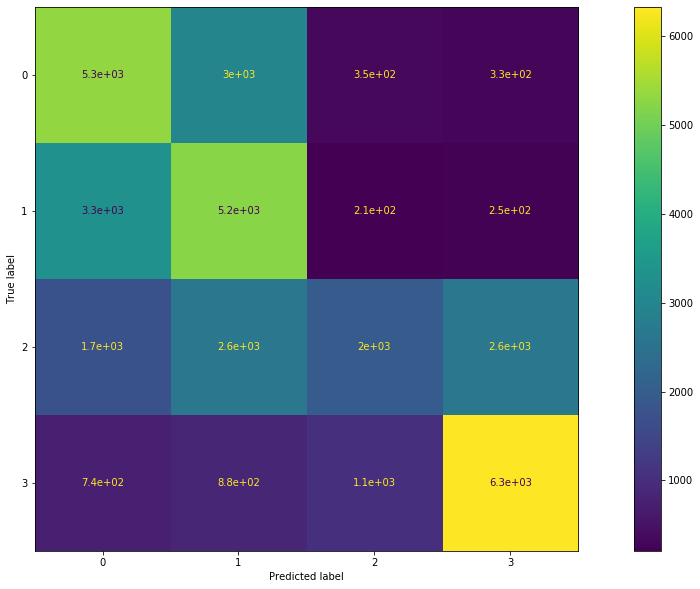

In [114]:
# confusion matrix
# Plotting Confusion Matrix
# REFERENCE: https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa

from sklearn.metrics import confusion_matrix
# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(20, 10))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(est1, X_test, y_test,ax=ax)

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_new1)
cm

array([[5334, 2992,  349,  327],
       [3300, 5241,  209,  251],
       [1746, 2627, 1983, 2644],
       [ 744,  877, 1054, 6325]], dtype=int64)

<br><b>0-20: 0 </b></br>
<br><b>21-30: 1 </b></br>
<br><b>30 - 60: 2 </b></br>
<br><b>60+: 3 </b></br>
# Observations
<br><b>1: Model is bad in predicting label(30-60) and okay for class labels(0-20 and 21-30).</b></br>
<br><b>2: Model is good in predicting label(60+) and few times misclassifies into other labels</b></br>

In [117]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_new1)

0.5244840707718801

# Due to Hyperparameter Tuning on all the features the accuracy of the model increased to nearly 52%

# Hyper Tuning with top 15 features only

In [118]:
rf_parameters, rf_ht_score,results=hypertuning_rscv(est,random_grid,7,X_train_rf,y_train_rf)

In [119]:
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 7,
 'n_estimators': 750}

In [120]:
results[['param_max_depth','param_min_samples_leaf','param_n_estimators','param_criterion','mean_train_score','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_n_estimators,param_criterion,mean_train_score,mean_test_score
0,6,1,750,entropy,0.499487,0.495006
1,4,6,100,gini,0.488727,0.488590
2,2,6,400,gini,0.465394,0.464689
3,4,5,5,entropy,0.463691,0.463253
4,25,7,750,entropy,0.681773,0.504241
5,2,1,5,gini,0.427402,0.428065
6,25,5,100,entropy,0.733809,0.497893


In [ ]:
# For 1 set of parameters it is overfitting

In [121]:
rf_ht_score

0.5042411600406355

In [122]:
est2=RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion='entropy', max_depth= 25,min_samples_leaf= 7, n_estimators= 750)

In [123]:
est2.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [124]:
# predict
y_pred_new2=est2.predict(X_test_rf) # predicting the data on test data points
y_pred_new2 # prediction values

array([1, 3, 1, ..., 0, 0, 1])

In [125]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_rf,y_pred_new2)
cm

array([[5157, 3029,  507,  309],
       [3572, 4798,  384,  247],
       [1825, 2320, 2315, 2540],
       [ 749,  766, 1511, 5974]], dtype=int64)

# Observations
<br><b>1: Model is good in predicting label(60+) and few times misclassifies into other labels</b></br>
<br><b>2: Model is bad in predicting rest of class labels</b></br>

In [126]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rf,y_pred_new2)

0.5067355498152931

# Accuracy is nearly 51 % with top 15 features hypertuning

# Summary
#### 1: random forest with all features: 47.6%
##### 2: random forest with all features with HyperParameter Tuning: 52%
##### 3: Random Forest with top 15 features: 45%
##### 4: Random Forest with top 15 features with HyperParameter Tuning: 51%

# Questions

<br><b>1: Is the relationship significant ?</b></br>
<br>Based on feature_importances_ property sklearn gives for Random Forest we get features with a score suggesting their importance for predicting target output . High score means more useful in prediction. </br>

<br><b>2: Is there any multicollinearity in the model?</b></br>
<br>There is multicollinearity between the features.</br>
<br><b>For random Forest</b></br>
<br>There is no issue of multicollinearity because Random Forest uses bootstrap sampling and feature sampling, i.e row sampling and column sampling. Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points.</br>

<br><b>3: In the multivariate models are predictor variables independent of all the other predictor variables? </b></br>
<br>No, because Random Forest handles correlated variables due to bagging.</br>

<br><b>4: Are any model assumptions violated? </b></br>
<br>No model assumptions were violated here because Random Forest has no assumptions and as the models performed as expected in classifying the data into multiclass classes.</br>


<br><b>5: In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?</b></br>
<br>For Random Forest there is a property feature_importances_ which tells which variables are important with a score. A feature with high score is more useful for predicting target variable. In my case Admission_Deposit,Visitors with Patient, Available extra room in Hospital are the most significant variables.</br>

<br><b>6: Does the model makes sense?</b></br>
<br><b>Random Forest</b></br>
<br><b>1:</b>Random forests is great with high dimensional data since we are working with subsets of data. It is faster to train than decision trees because we are working only on a subset of features in this model, so we can easily work with hundreds of features. </br>
<br><b>2:</b>In Random Forest which is low bias(makes less assumptions about target variable) and high variance as input to random forest(which is Decision Tree) but with column and row sampling and finally aggregation we get low bias and low variance. We got accuracy of 46% and then when we applied Hyperparameter Tuning (RandomSearchCV) we got even better accuracy of nearly 54%.</br>

<br><b>7:Does regularization help?</b></br>
<br>Regularization is used to avoid overfitting problem.It is applied to a cost function that is used to update values of parameters. 
</br>
<br>In Random Forest to avoid overfitting we need to limit the tree depth at a certain value to not grow further. Hence you can use maximum depth parameter as regularization paramter.</br>

<br><b>8: Which independent variables are significant?</b></br>
<br> Based on the property sklearn provides for Random Forest feature_importances_ we can come to know which features is highly significant and hence at the root of the node(reduction in Entropy or Gini Impurity).</br>
<br> In my case Admission_Deposit and Visitors with patient are the 2 most significant variables.</br>

<br><b>9:Which hyperparameters are important?</b></br>
<br>For Random Forest max_depth is very important i.e.maximum depth of a tree to grow because if we keep on growing the tree then it lead to overfitting problem  and best value of this was calculated using RandomSearchCV.</br>

# Logistic Regression

#### As Logistic Regression is affected by multicollinearity between features hence removing the multicollinear features.

# Finding Multicollinearity between independent variables
<br>Using VIF(Variable Inflation Factors) determines the strength of the correlation between the independent variables.<br> 
<br>It is predicted by taking a variable and regressing it against every other variable.</br>
<br>VIF= 1/(1-R^2) </br>
<br>R^2 value is determined to find out how well an independent variable is described by the other independent variables.</br>
<br>A high value of R^2 means that the variable is highly correlated with the other variables</br>
<br>So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable</br>

In [127]:
X.columns

Index(['Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'Admission_Deposit', 'Hospital_type_code_a',
       'Hospital_type_code_b', 'Hospital_type_code_c', 'City_Code_Hospital_1',
       'City_Code_Hospital_2', 'City_Code_Hospital_3', 'City_Code_Hospital_5',
       'City_Code_Hospital_6', 'City_Code_Hospital_7', 'City_Code_Hospital_9',
       'Hospital_region_code_X', 'Hospital_region_code_Y',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F',
       'Type of Admission_Urgent_Situation', 'Severity', 'lower_Age',
       'Upper_Age'],
      dtype='object')

In [128]:
# Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [129]:
calc_vif(X)

,variables,VIF
0,Available Extra Rooms in Hospital,1.301989
1,Bed Grade,1.202137
2,Visitors with Patient,1.075526
3,Admission_Deposit,1.085532
4,Hospital_type_code_a,3.632468
5,Hospital_type_code_b,10.400286
6,Hospital_type_code_c,5.394481
7,City_Code_Hospital_1,inf
8,City_Code_Hospital_2,inf
9,City_Code_Hospital_3,22.796390


<br>VIF starts at 1 and has no upper limit</br>
<br>VIF = 1, no correlation between the independent variable and the other variables</br>
<br>VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others</br>

So inf means infinity suggesting R^2 is 1 so very very high correlated with other variables. So need to drop features having values more than 5.

In [130]:
# Reference: https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
# Lets first convert the features into standarization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X.values) # This converts column names into index numbers 0,1....
df=pd.DataFrame(data=X_std,index=X.index, columns=X.columns) # to get column names as original column names and not index
df.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,-0.119124,0.408785,-0.306087,-0.818354,-0.876838,-0.540022,2.416507,-0.450989,-0.454428,-0.332761,...,-0.612744,-0.355668,-0.341813,-0.454428,-0.450989,1.350910,0.980312,-1.415386,1.430818,1.429220
1,0.742283,-0.726495,-0.736278,-1.061851,-0.876838,-0.540022,2.416507,-0.450989,-0.454428,3.005160,...,-0.612744,-0.355668,-0.341813,-0.454428,-0.450989,1.350910,0.980312,0.088894,-0.070047,-0.128941
2,1.603690,-1.861774,0.124104,1.121683,-0.876838,1.851776,-0.413820,-0.450989,2.200568,-0.332761,...,-0.612744,-0.355668,-0.341813,2.200568,-0.450989,-0.740242,0.980312,1.593174,-0.070047,-0.128941
3,0.742283,-0.726495,-0.306087,0.168868,-0.876838,-0.540022,-0.413820,-0.450989,-0.454428,-0.332761,...,-0.612744,2.811610,-0.341813,-0.454428,-0.450989,-0.740242,0.980312,0.088894,0.430241,0.390446
4,0.742283,-1.861774,-0.736278,0.532349,1.140462,-0.540022,-0.413820,-0.450989,-0.454428,-0.332761,...,-0.612744,-0.355668,-0.341813,-0.454428,-0.450989,1.350910,-1.020083,-1.415386,1.430818,1.429220


In [131]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.301989
1,Bed Grade,1.202137
2,Visitors with Patient,1.075526
3,Admission_Deposit,1.085500
4,Hospital_type_code_a,3.632468
5,Hospital_type_code_b,10.400286
6,Hospital_type_code_c,5.394481
7,City_Code_Hospital_1,inf
8,City_Code_Hospital_2,inf
9,City_Code_Hospital_3,inf


In [132]:
# Dropping column Hospital_type_code_b
# Reference: https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
cols = [5]
df.drop(df.columns[cols],axis=1,inplace=True)

In [133]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.301824
1,Bed Grade,1.201808
2,Visitors with Patient,1.074705
3,Admission_Deposit,1.083582
4,Hospital_type_code_a,2.587562
5,Hospital_type_code_c,5.377408
6,City_Code_Hospital_1,inf
7,City_Code_Hospital_2,inf
8,City_Code_Hospital_3,inf
9,City_Code_Hospital_5,inf


In [134]:
# Again there are few columns dropping column Department_gynecology
cols = [16]
df.drop(df.columns[cols],axis=1,inplace=True)

In [135]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.301063
1,Bed Grade,1.201426
2,Visitors with Patient,1.074625
3,Admission_Deposit,1.080728
4,Hospital_type_code_a,2.587539
5,Hospital_type_code_c,5.377291
6,City_Code_Hospital_1,inf
7,City_Code_Hospital_2,inf
8,City_Code_Hospital_3,inf
9,City_Code_Hospital_5,inf


In [136]:

# Again there are few columns dropping column Hospital_type_code_c
cols = [5]
df.drop(df.columns[cols],axis=1,inplace=True)

In [137]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.300618
1,Bed Grade,1.201304
2,Visitors with Patient,1.074603
3,Admission_Deposit,1.077526
4,Hospital_type_code_a,2.535375
5,City_Code_Hospital_1,inf
6,City_Code_Hospital_2,inf
7,City_Code_Hospital_3,inf
8,City_Code_Hospital_5,inf
9,City_Code_Hospital_6,2.649839


In [138]:

# Again there are few columns dropping column Ward_Type_S
cols = [18]
df.drop(df.columns[cols],axis=1,inplace=True)

In [139]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.211453
1,Bed Grade,1.199138
2,Visitors with Patient,1.074075
3,Admission_Deposit,1.077479
4,Hospital_type_code_a,2.520736
5,City_Code_Hospital_1,inf
6,City_Code_Hospital_2,inf
7,City_Code_Hospital_3,inf
8,City_Code_Hospital_5,inf
9,City_Code_Hospital_6,2.649347


In [140]:
cols = [22]
df.drop(df.columns[cols],axis=1,inplace=True)

In [141]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.211453
1,Bed Grade,1.199060
2,Visitors with Patient,1.074008
3,Admission_Deposit,1.077431
4,Hospital_type_code_a,2.520475
5,City_Code_Hospital_1,inf
6,City_Code_Hospital_2,inf
7,City_Code_Hospital_3,inf
8,City_Code_Hospital_5,inf
9,City_Code_Hospital_6,2.649274


In [142]:
cols = [24]
df.drop(df.columns[cols],axis=1,inplace=True)

In [143]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.210070
1,Bed Grade,1.197255
2,Visitors with Patient,1.074003
3,Admission_Deposit,1.077283
4,Hospital_type_code_a,2.520475
5,City_Code_Hospital_1,inf
6,City_Code_Hospital_2,inf
7,City_Code_Hospital_3,inf
8,City_Code_Hospital_5,inf
9,City_Code_Hospital_6,2.648915


In [144]:
cols = [5]
df.drop(df.columns[cols],axis=1,inplace=True)

In [145]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.210070
1,Bed Grade,1.197255
2,Visitors with Patient,1.074003
3,Admission_Deposit,1.077033
4,Hospital_type_code_a,2.520475
5,City_Code_Hospital_2,inf
6,City_Code_Hospital_3,inf
7,City_Code_Hospital_5,inf
8,City_Code_Hospital_6,2.648915
9,City_Code_Hospital_7,inf


In [146]:
cols = [5]
df.drop(df.columns[cols],axis=1,inplace=True)

In [147]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.210070
1,Bed Grade,1.197255
2,Visitors with Patient,1.074003
3,Admission_Deposit,1.077252
4,Hospital_type_code_a,2.520475
5,City_Code_Hospital_3,inf
6,City_Code_Hospital_5,inf
7,City_Code_Hospital_6,2.648915
8,City_Code_Hospital_7,inf
9,City_Code_Hospital_9,3.696469


In [148]:
cols = [5]
df.drop(df.columns[cols],axis=1,inplace=True)

In [149]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.210070
1,Bed Grade,1.197255
2,Visitors with Patient,1.074003
3,Admission_Deposit,1.077292
4,Hospital_type_code_a,2.520475
5,City_Code_Hospital_5,1.819977
6,City_Code_Hospital_6,2.648915
7,City_Code_Hospital_7,inf
8,City_Code_Hospital_9,3.696469
9,Hospital_region_code_X,5.516070


In [150]:
cols = [7]
df.drop(df.columns[cols],axis=1,inplace=True)

In [151]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.210070
1,Bed Grade,1.197255
2,Visitors with Patient,1.074003
3,Admission_Deposit,1.077249
4,Hospital_type_code_a,2.520475
5,City_Code_Hospital_5,1.819977
6,City_Code_Hospital_6,2.648915
7,City_Code_Hospital_9,3.696469
8,Hospital_region_code_X,5.516070
9,Hospital_region_code_Y,inf


In [152]:
cols = [8]
df.drop(df.columns[cols],axis=1,inplace=True)

In [153]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.209113
1,Bed Grade,1.197024
2,Visitors with Patient,1.073873
3,Admission_Deposit,1.076173
4,Hospital_type_code_a,2.303830
5,City_Code_Hospital_5,1.388043
6,City_Code_Hospital_6,2.276844
7,City_Code_Hospital_9,3.687264
8,Hospital_region_code_Y,inf
9,Department_anesthesia,1.078557


In [154]:
cols = [13]
df.drop(df.columns[cols],axis=1,inplace=True)

In [155]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.209113
1,Bed Grade,1.197024
2,Visitors with Patient,1.073873
3,Admission_Deposit,1.076175
4,Hospital_type_code_a,2.303830
5,City_Code_Hospital_5,1.388043
6,City_Code_Hospital_6,2.276844
7,City_Code_Hospital_9,3.687264
8,Hospital_region_code_Y,9.415333
9,Department_anesthesia,1.078557


In [156]:
cols = [13]
df.drop(df.columns[cols],axis=1,inplace=True)

In [157]:
calc_vif(df)

,variables,VIF
0,Available Extra Rooms in Hospital,1.209057
1,Bed Grade,1.196404
2,Visitors with Patient,1.073788
3,Admission_Deposit,1.075468
4,Hospital_type_code_a,1.892751
5,City_Code_Hospital_5,1.387908
6,City_Code_Hospital_6,2.156070
7,City_Code_Hospital_9,1.617174
8,Hospital_region_code_Y,3.739466
9,Department_anesthesia,1.078351


In [158]:
data_new=df
data_new['Stay']=data['Stay'].values
data_new.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_9,Hospital_region_code_Y,Department_anesthesia,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Facility_Code_D,Ward_Facility_Code_E,Type of Admission_Urgent_Situation,Severity,Upper_Age,Stay
0,-0.119124,0.408785,-0.306087,-0.818354,-0.876838,3.038631,-0.413775,-0.300508,-0.796346,-0.316036,-0.321255,1.492172,-0.813509,-0.454428,-0.450989,0.980312,-1.415386,1.429220,0
1,0.742283,-0.726495,-0.736278,-1.061851,-0.876838,-0.329096,-0.413775,-0.300508,-0.796346,-0.316036,-0.321255,1.492172,-0.813509,-0.454428,-0.450989,0.980312,0.088894,-0.128941,0
2,1.603690,-1.861774,0.124104,1.121683,-0.876838,-0.329096,-0.413775,-0.300508,1.255735,-0.316036,-0.321255,1.492172,-0.813509,2.200568,-0.450989,0.980312,1.593174,-0.128941,0
3,0.742283,-0.726495,-0.306087,0.168868,-0.876838,-0.329096,-0.413775,-0.300508,1.255735,-0.316036,-0.321255,-0.670164,1.229242,-0.454428,-0.450989,0.980312,0.088894,0.390446,0
4,0.742283,-1.861774,-0.736278,0.532349,1.140462,-0.329096,2.416774,-0.300508,-0.796346,-0.316036,3.112796,1.492172,-0.813509,-0.454428,-0.450989,-1.020083,-1.415386,1.429220,0


In [159]:
X_lr=data_new.drop('Stay', axis=1)
y_lr=data_new['Stay'].values
X_lr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_9,Hospital_region_code_Y,Department_anesthesia,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Facility_Code_D,Ward_Facility_Code_E,Type of Admission_Urgent_Situation,Severity,Upper_Age
0,-0.119124,0.408785,-0.306087,-0.818354,-0.876838,3.038631,-0.413775,-0.300508,-0.796346,-0.316036,-0.321255,1.492172,-0.813509,-0.454428,-0.450989,0.980312,-1.415386,1.429220
1,0.742283,-0.726495,-0.736278,-1.061851,-0.876838,-0.329096,-0.413775,-0.300508,-0.796346,-0.316036,-0.321255,1.492172,-0.813509,-0.454428,-0.450989,0.980312,0.088894,-0.128941
2,1.603690,-1.861774,0.124104,1.121683,-0.876838,-0.329096,-0.413775,-0.300508,1.255735,-0.316036,-0.321255,1.492172,-0.813509,2.200568,-0.450989,0.980312,1.593174,-0.128941
3,0.742283,-0.726495,-0.306087,0.168868,-0.876838,-0.329096,-0.413775,-0.300508,1.255735,-0.316036,-0.321255,-0.670164,1.229242,-0.454428,-0.450989,0.980312,0.088894,0.390446
4,0.742283,-1.861774,-0.736278,0.532349,1.140462,-0.329096,2.416774,-0.300508,-0.796346,-0.316036,3.112796,1.492172,-0.813509,-0.454428,-0.450989,-1.020083,-1.415386,1.429220


In [160]:
# train cv test split
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.33, stratify=y_lr)
#X_train_df, X_cv, y_train_df, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)                              

In [161]:
print("Number of train data points",X_train_lr.shape[0])
print("Number of test data points",X_test_lr.shape[0])

Number of train data points 73094
Number of test data points 36003


In [162]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_lr, y_train_lr)

In [163]:
# getting feature importance 
importance=clf.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.16404
Feature: 1, Score: 0.12798
Feature: 2, Score: -1.19786
Feature: 3, Score: -0.09480
Feature: 4, Score: 0.09633
Feature: 5, Score: 0.02556
Feature: 6, Score: -0.08261
Feature: 7, Score: -0.08108
Feature: 8, Score: 0.20230
Feature: 9, Score: 0.07646
Feature: 10, Score: 0.01974
Feature: 11, Score: 0.28815
Feature: 12, Score: 0.10807
Feature: 13, Score: -0.23738
Feature: 14, Score: 0.03251
Feature: 15, Score: 0.22835
Feature: 16, Score: -0.20954
Feature: 17, Score: -0.06881


### Visitors with patient, Type_of _Admission_Urgent_Situation, Ward_Type_Q are features are most important in prediction of target.

In [164]:
# Weight vectors in logistic regression can tell which about feature importance
print(clf.coef_)
print(clf.intercept_)

[[ 0.16403916  0.12797939 -1.19785856 -0.09479833  0.09632512  0.02555697
  -0.08261317 -0.08108001  0.20229601  0.07646252  0.01973532  0.28815434
   0.10806533 -0.23738202  0.03251128  0.22835056 -0.20954102 -0.06881059]
 [ 0.23419323 -0.13662389 -1.19691047  0.12333531  0.07702786  0.00965558
  -0.01615001  0.0071178   0.00552301  0.0676243  -0.00843891  0.37882337
   0.18552731 -0.02032303  0.03850067 -0.03400466 -0.06367553 -0.00965827]
 [-0.08577609 -0.00297274  0.6757452  -0.00906863 -0.02694992  0.00479074
   0.02327623  0.01704618 -0.02687465 -0.02748086 -0.02613699 -0.12212304
  -0.05153822  0.02444484 -0.0084221  -0.06490744  0.03582864 -0.0156143 ]
 [-0.3124563   0.01161725  1.71902383 -0.01946834 -0.14640307 -0.04000328
   0.07548695  0.05691602 -0.18094437 -0.11660596  0.01484057 -0.54485467
  -0.24205442  0.23326021 -0.06258986 -0.12943846  0.23738791  0.09408316]]
[-0.156829   -0.16500079  0.4215565  -0.09972671]


##### Weight vectors in Logistic Regression can tell you about feature importance. Here as we have 11 classes(categories) so for each feature it will have some weight which will contribute for a given class prediction.

In [165]:
y_pred2=clf.predict(X_test_lr)


In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lr,y_pred2)

0.48970919090075826

### Accuracy is nearly 49% which is bad.

In [167]:
# Trying the Hyperparameter Tuning for Logistic Regression
lr=LogisticRegression(n_jobs=-1)
random_grid_1={'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.0001,0.001,0.01,0.1,1,10,25,50,100,150,300,500],
            'tol':[0.00001,0.0001,0.001,0.01,0.5,0.1,1,10],
             'solver':['newton-cg','sag','saga'],
             }

In [168]:
# Creating a function 
def hypertuning_lrcv(lr,random_grid_1,nbr_iter,X,y):
    lrmsearch=RandomizedSearchCV(lr,param_distributions=random_grid_1,n_jobs=-1,n_iter=nbr_iter,cv=3,return_train_score=True)
    lrmsearch.fit(X_train_lr,y_train_lr)  # Fitting the RandomizedSearchCV on data
    ht_params=lrmsearch.best_params_ # Getting best parameters 
    ht_score=lrmsearch.best_score_ # Getting Score of randomziedSearchCV
    results_lr=pd.DataFrame(lrmsearch.cv_results_)
    return ht_params,ht_score,results_lr

In [171]:
lr_parameters, lr_ht_score,results_lr=hypertuning_lrcv(lr,random_grid_1,5,X_train_lr,y_train_lr)

In [172]:
results_lr[['param_solver','param_penalty','param_C','mean_train_score','mean_test_score']]

,param_solver,param_penalty,param_C,mean_train_score,mean_test_score
0,saga,l1,500,0.488672,0.488166
1,saga,l2,1,0.490615,0.489917
2,newton-cg,l2,500,0.490642,0.489944
3,newton-cg,l2,0.01,0.491148,0.489903
4,sag,l1,0.1,NaN,NaN


In [ ]:
# Here we are getting score for only 4 iteration only 
# here mean train score and mean test score is same nearly for all sets of parameters so no overfitting. 

In [173]:
lr_parameters

{'tol': 1e-05, 'solver': 'newton-cg', 'penalty': 'l2', 'C': 500}

In [174]:
 lr_ht_score

0.48994442307493835

In [175]:
# creating again new object classifier
classifier_lr=LogisticRegression(n_jobs=-1,solver='newton-cg',penalty='l2',C=500, tol=1e-05).fit(X_train_lr,y_train_lr)

In [176]:
y_pred3=classifier_lr.predict(X_test_lr)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lr,y_pred3)

0.48970919090075826

# Accuracy is 49 % due to HyperParameter Tuning but it is not increased at all much.

In [178]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_lr,y_pred3)
cm

array([[4666, 2767, 1254,  315],
       [3081, 4364, 1307,  249],
       [1609, 2125, 2631, 2635],
       [ 627,  666, 1737, 5970]], dtype=int64)

# Observations
##### 0-20: 0
##### 21-30: 1
##### 30-60: 2
###### 60+: 3
    
<br>Here we can see that model fairly well predicts class labels (60+)</br>
<br>Model predicts bad on class label (31-60).</br>
<br>Model predicts okay on rest of the class labels</br>

In [179]:
X_lr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_9,Hospital_region_code_Y,Department_anesthesia,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Facility_Code_D,Ward_Facility_Code_E,Type of Admission_Urgent_Situation,Severity,Upper_Age
0,-0.119124,0.408785,-0.306087,-0.818354,-0.876838,3.038631,-0.413775,-0.300508,-0.796346,-0.316036,-0.321255,1.492172,-0.813509,-0.454428,-0.450989,0.980312,-1.415386,1.429220
1,0.742283,-0.726495,-0.736278,-1.061851,-0.876838,-0.329096,-0.413775,-0.300508,-0.796346,-0.316036,-0.321255,1.492172,-0.813509,-0.454428,-0.450989,0.980312,0.088894,-0.128941
2,1.603690,-1.861774,0.124104,1.121683,-0.876838,-0.329096,-0.413775,-0.300508,1.255735,-0.316036,-0.321255,1.492172,-0.813509,2.200568,-0.450989,0.980312,1.593174,-0.128941
3,0.742283,-0.726495,-0.306087,0.168868,-0.876838,-0.329096,-0.413775,-0.300508,1.255735,-0.316036,-0.321255,-0.670164,1.229242,-0.454428,-0.450989,0.980312,0.088894,0.390446
4,0.742283,-1.861774,-0.736278,0.532349,1.140462,-0.329096,2.416774,-0.300508,-0.796346,-0.316036,3.112796,1.492172,-0.813509,-0.454428,-0.450989,-1.020083,-1.415386,1.429220


In [180]:
df=X_lr

In [181]:
df.shape

(109097, 18)

In [182]:

# Again there are few columns dropping column 18
cols = [3,4,5,6,7,9,10,14,17]
df.drop(df.columns[cols],axis=1,inplace=True)

In [183]:
df.shape

(109097, 9)

In [184]:
# train cv test split
from sklearn.model_selection import train_test_split
X_train_lrvad, X_test_lrvad, y_train_lrvad, y_test_lrvad = train_test_split(df, y_lr, test_size=0.33, stratify=y_lr)

In [185]:
from sklearn.linear_model import LogisticRegression
clfvad = LogisticRegression(random_state=0).fit(X_train_lrvad, y_train_lrvad)

In [186]:
# getting feature importance 
importance=clfvad.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.18185
Feature: 1, Score: 0.12645
Feature: 2, Score: -1.17345
Feature: 3, Score: 0.17527
Feature: 4, Score: 0.31315
Feature: 5, Score: 0.13262
Feature: 6, Score: -0.24840
Feature: 7, Score: 0.25224
Feature: 8, Score: -0.20540


In [187]:
y_pred2=clfvad.predict(X_test_lrvad)


In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lrvad,y_pred2)

0.4840152209538094

In [189]:
lr_parameters, lr_ht_score,results_lr=hypertuning_lrcv(lr,random_grid_1,3,X_train_lrvad,y_train_lrvad)

In [190]:
results_lr[['param_solver','param_penalty','param_C','mean_train_score','mean_test_score']]

,param_solver,param_penalty,param_C,mean_train_score,mean_test_score
0,sag,l2,0.1,0.490841,0.489903
1,sag,l1,500,NaN,NaN
2,saga,l1,500,0.484794,0.484636


In [191]:
lr_parameters

{'tol': 0.0001, 'solver': 'sag', 'penalty': 'l2', 'C': 0.1}

In [192]:
classifier_lrvad=LogisticRegression(n_jobs=-1,solver='sag',penalty='l2',C=0.1, tol=0.0001).fit(X_train_lrvad,y_train_lrvad)

In [193]:
y_pred3=classifier_lrvad.predict(X_test_lrvad)

In [194]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_lrvad,y_pred3)
cm

array([[4505, 3035, 1117,  345],
       [3152, 4460, 1131,  258],
       [1559, 2181, 2606, 2654],
       [ 640,  713, 1794, 5853]], dtype=int64)

# Model predicts fairly well class labels (60+) 

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lrvad,y_pred3)

0.48395967002749773

# Accuracy is 48 % with top 10 features hyperparameter Tuning

# Questions

<br><b>1: Is the relationship significant ?</b></br>
<br> Since this is multiclass classification problem I tried using p value but we can't use p value for multi class classification so using the sklearn property model_coef[0] i got feature importance value for each feature. Also, in logistic regression the weight vectors for ech class get some values which tells which feature is more importance in prediction the given class label.</br>

<br><b>2: Is there any multicollinearity in the model?</b></br>
<br>There is multicollinearity between the features.</br>
<br>Logistic Regression gets affected by multicollinearity points hence I have used VIF(Variable Inflation factors) to remove correlated features and get all non collinear features for model building </br>

<br><b>3: In the multivariate models are predictor variables independent of all the other predictor variables</b></br>
<br>Yes, through the concept of VIF(Variable Inflation factors) I have removed the features dependent on other features.</br>
    

<br><b>4: Are any model assumptions violated? </b></br>
<br>No model assumptions were violated here as the models performed as expected in classifying the data into multiclass classes.</br>

<br><b>5: In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?</b></br>
<br>Visitors with patient, Ward_Type_Q and Type_of_Admission_Urgent_Situation features are most important in prediction of target.</br>

<br><b>6: Does the model makes sense?</b></br>

<br><b> Logistic Regression </b></br>
<br>Logistic Regression works well with large dataset hence I selected it but it gets greatly affected by multicollinearity and hence we need to remove collinearity between features after it gave 49% acuracy. But on Hyperparameter Tuning it gave a accuracy of 49% resulting into no change.</br>

<br><b>7:Does regularization help?</b></br>
<br>Regularization is used to avoid overfitting problem.It is applied to a cost function that is used to update values of parameters. Since we are not trying to predict the correct value for the feature in Decision tree then we don't prevent overfitting by changing the value of feature.</br>
<br>Logistic Regression can be regularization is useful because to avoid overfitting the data but again C determines the strength of regularization term if C is high (C=1/lambda) meaning lambda is 0 resulting main focus is given to loss term in logistic regression tending to overfitting. If C is low meaning lambda is high and more focus is given to regularization term tending to underfit and less focus to loss term(to reduce error). </br>
<br>Also, L1 regularization creates sparsity i.e if regularization term is given more focus it tends to minimize W^2 (squared) term very much to get weight vectors to features to 0 and as most features will be 0 it will lead to 0. </br>
<br> Although in my case it doesn't help </br>

<br><b>8: Which independent variables are significant?</b></br>
<br>In logistic regression weight vectors can tell which features are important.</br>
<br>Also by property of Logistic Regression model.coef[0] we can come to know the features worth.</br>
<br> Visitor with Patient,Ward_Type_Q and Type_of_Admission_Urgent_Situation are most significant variables.</br>
<br> Since it is multi class we can't use p value.</br>

<br><b>9:Which hyperparameters are important?</b></br>
<br>For Logistic regression C is very important and was calculated using randomSearchCV.It is described in question 7 why C is important in Logistic Regression.</br>

# Decision Tree

In [196]:
X_dt=data.drop('Stay', axis=1)
y_dt=data['Stay'].values
X_dt.head()

,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,City_Code_Hospital_1,...,Ward_Type_S,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Urgent_Situation,Severity,lower_Age,Upper_Age
0,190418,3,2,40733,3,3925.0,0,0,1,0,...,0,0,0,0,0,1,1,0,71,80
1,162579,4,1,109174,2,3649.0,0,0,1,0,...,0,0,0,0,0,1,1,1,41,50
2,39317,5,0,96994,4,6124.0,0,1,0,0,...,0,0,0,1,0,0,1,2,41,50
3,48301,4,1,73176,3,5044.0,0,0,0,0,...,0,1,0,0,0,0,1,1,51,60
4,202732,4,0,2835,2,5456.0,1,0,0,0,...,0,0,0,0,0,1,0,0,71,80


In [197]:
# train test split
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.33, stratify=y_dt)

In [198]:
print("Number of train data points",X_train_dt.shape[0])
print("Number of test data points",X_test_dt.shape[0])

Number of train data points 73094
Number of test data points 36003


In [199]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtml=DecisionTreeClassifier()
dtml.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [200]:
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# getting feature importance 
importance=dtml.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.16236
Feature: 1, Score: 0.04472
Feature: 2, Score: 0.03262
Feature: 3, Score: 0.16066
Feature: 4, Score: 0.14817
Feature: 5, Score: 0.16543
Feature: 6, Score: 0.00910
Feature: 7, Score: 0.00554
Feature: 8, Score: 0.00593
Feature: 9, Score: 0.00544
Feature: 10, Score: 0.00270
Feature: 11, Score: 0.00537
Feature: 12, Score: 0.00744
Feature: 13, Score: 0.00629
Feature: 14, Score: 0.00320
Feature: 15, Score: 0.00408
Feature: 16, Score: 0.00696
Feature: 17, Score: 0.00426
Feature: 18, Score: 0.00751
Feature: 19, Score: 0.01100
Feature: 20, Score: 0.00789
Feature: 21, Score: 0.03710
Feature: 22, Score: 0.00777
Feature: 23, Score: 0.01242
Feature: 24, Score: 0.00542
Feature: 25, Score: 0.00404
Feature: 26, Score: 0.00411
Feature: 27, Score: 0.00554
Feature: 28, Score: 0.00832
Feature: 29, Score: 0.01041
Feature: 30, Score: 0.02103
Feature: 31, Score: 0.04017
Feature: 32, Score: 0.03701


### In Decision Tree there is inbuilt property feature_importances_ which gives feature importance for each feature.
### Working: The impurity-based feature importances.

### The higher, the more important the feature. 
#### The importance of a feature is computed as the (normalized) total reduction of the entropy or Gini impurity(criterion) brought by that feature. It is also known as the Gini importance.

In [201]:
y_pred_dt=dtml.predict(X_test_dt) # predicting the data on test data points
y_pred_dt # prediction values

array([2, 0, 1, ..., 1, 3, 1])

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dt,y_pred_dt)

0.4217148570952421

# Accuracy of 42% is very bad.Now trying the model with top 10 features only.

In [204]:
# getting feature importance and top features
#Reference: https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
import operator
importance=dtml.feature_importances_
dict1={}
for i,v in enumerate(importance):
    dict1[i]=v
#print(dict)
features_decreasing_dt = sorted(dict1.items(),key=operator.itemgetter(1),reverse=True)

df = DataFrame(features_decreasing_dt,columns=['Feature','Feature_importance'])
df

,Feature,Feature_importance
0,5,0.165429
1,0,0.162357
2,3,0.160658
3,4,0.148168
4,1,0.044724
5,31,0.040171
6,21,0.037096
7,32,0.037010
8,2,0.032615
9,30,0.021027


### From above we can select top 10 features having most importance for prediction

In [205]:
cols=[23,19,29,6,28,20,22,18,12,16,13,8,27,9,24,11,17,26,15,25,14,10]
col=list(set(cols))
print(col)
X_new2=X_dt.drop(X_dt.columns[col],axis=1)
X_new2.head() # Get top 10 features based on its importance

[6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Hospital_type_code_b,Ward_Type_Q,Severity,lower_Age,Upper_Age
0,190418,3,2,40733,3,3925.0,0,1,0,71,80
1,162579,4,1,109174,2,3649.0,0,1,1,41,50
2,39317,5,0,96994,4,6124.0,1,1,2,41,50
3,48301,4,1,73176,3,5044.0,0,0,1,51,60
4,202732,4,0,2835,2,5456.0,0,1,0,71,80


In [206]:
# Now again training the data for these 10 features for model building
# train test split
from sklearn.model_selection import train_test_split
X_train_dt_new, X_test_dt_new, y_train_dt_new, y_test_dt_new = train_test_split(X_new2, y_dt, test_size=0.33, stratify=y_dt)

In [207]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_new=DecisionTreeClassifier()
dt_new.fit(X_train_dt_new,y_train_dt_new) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
y_pred1_new=dt_new.predict(X_test_dt_new) # predicting the data on test data points
y_pred1_new

array([3, 3, 0, ..., 0, 2, 2])

In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dt_new,y_pred1_new)

0.40213315557036916

# Accuracy dropped by 2% by considering only top 10 features

In [210]:
# Trying the Hyperparameter Tuning for Decision Tree
dtc=DecisionTreeClassifier()
random_grid_dt={'max_depth':[2,4,6,8,12,15,25,50,75],
                'splitter':['best', 'random'],
             'criterion':['gini','entropy']
             }

In [211]:
# Creating a function 
def hypertuning_dtcv(est,random_grid,nbr_iter,X,y):
    dtsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=3,return_train_score=True) # kfold cv=5 
    dtsearch.fit(X,y)  # Fitting the RandomizedSearchCV on data
    ht_params=dtsearch.best_params_ # Getting best parameters 
    ht_score=dtsearch.best_score_ # Getting Score of randomziedSearchCV
    results_dt=pd.DataFrame(dtsearch.cv_results_)
    return ht_params,ht_score,results_dt

In [212]:
dt_parameters, dt_ht_score,results_dt=hypertuning_dtcv(dtc,random_grid_dt,7,X_train_dt,y_train_dt) # 5 possible random combinations(options) to selected 

In [213]:
results_dt[['param_splitter','param_max_depth','param_criterion','mean_test_score','mean_train_score']]

,param_splitter,param_max_depth,param_criterion,mean_test_score,mean_train_score
0,random,15,entropy,0.470846,0.633103
1,random,25,gini,0.427053,0.939414
2,random,75,entropy,0.419474,1.000000
3,best,15,entropy,0.464005,0.671095
4,random,50,gini,0.418365,1.000000
5,best,25,entropy,0.424604,0.963280
6,best,2,gini,0.422442,0.422442


In [214]:
dt_parameters

{'splitter': 'random', 'max_depth': 15, 'criterion': 'entropy'}

In [215]:
results_dt[['param_splitter','param_max_depth','param_criterion','mean_test_score','mean_train_score']]

,param_splitter,param_max_depth,param_criterion,mean_test_score,mean_train_score
0,random,15,entropy,0.470846,0.633103
1,random,25,gini,0.427053,0.939414
2,random,75,entropy,0.419474,1.000000
3,best,15,entropy,0.464005,0.671095
4,random,50,gini,0.418365,1.000000
5,best,25,entropy,0.424604,0.963280
6,best,2,gini,0.422442,0.422442


In [ ]:
# Here most of the sets of parameters are not overfitting ( high train score and low test score)
# For 3 set of parameter it is overfitting.

In [216]:
dt_cv=DecisionTreeClassifier(splitter='random', max_depth= 15, criterion='entropy')

In [217]:
dt_cv.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [218]:
y_pred_dtcv=dt_cv.predict(X_test_dt)

In [219]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dt,y_pred_dtcv)

0.4783768019331722

# Accuracy increased from 42 % to 48% by using Hyperparameter tuning

In [220]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_dt,y_pred_dtcv)
cm

array([[4529, 3269,  828,  376],
       [3238, 4738,  731,  294],
       [1774, 2380, 2547, 2299],
       [ 764,  872, 1955, 5409]], dtype=int64)

# Observations
##### 0-20: 0
###### 21-30:1
##### 31-60: 2
##### 60+: 3
### The model fairly well predicts class label (60+)
### the model very badly predicts for rest of the class labels

In [221]:
# Hypertuning with top 10 features only

In [222]:
dt_parameters, dt_ht_score,results_dt=hypertuning_dtcv(dtc,random_grid_dt,7,X_train_dt_new,y_train_dt_new)

In [223]:
results_dt[['param_splitter','param_max_depth','param_criterion','mean_test_score','mean_train_score']]

,param_splitter,param_max_depth,param_criterion,mean_test_score,mean_train_score
0,random,6,gini,0.416820,0.418591
1,random,75,gini,0.397953,1.000000
2,best,50,entropy,0.404123,1.000000
3,random,15,entropy,0.459162,0.593339
4,best,4,entropy,0.468506,0.469067
5,best,15,entropy,0.454866,0.642577
6,best,2,gini,0.422005,0.422005


In [224]:
# when max_depth is high say 75 and 50 it is overfitting

In [225]:
dt_parameters

{'splitter': 'best', 'max_depth': 4, 'criterion': 'entropy'}

In [226]:
dt_vad=DecisionTreeClassifier(splitter='best', max_depth= 4, criterion='entropy')

In [227]:
dt_vad.fit(X_train_dt_new,y_train_dt_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
y_pred_dtvad=dt_vad.predict(X_test_dt_new)

In [229]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dt_new,y_pred_dtvad)

0.4717940171652362

# Accuracy is 47%

In [230]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_dt_new,y_pred_dtvad)
cm

array([[5125, 3344,  353,  180],
       [3927, 4756,  161,  157],
       [2369, 2547, 2335, 1749],
       [1033, 1091, 2106, 4770]], dtype=int64)

# Model predicts fairly well class label (60+)
# Worst on labels(21-30) most of the times misclassifying it as (0-20) or (21-30)

# Questions

<br><b>1: Is the relationship significant ?</b></br>
<br>For Decision tree property of feature_importances_ tells which feature is important based on its scores. Which feature will be root node in the tree as it is more important.</br>

<br><b>2: Is there any multicollinearity in the model?</b></br>
<br>There is multicollinearity between the features.</br>
<br><b>Decision tree</b></br>
Reference: https://datascience.stackexchange.com/questions/31402/multicollinearity-in-decision-tree
<br>Although decision Tree is not affected by multicollinearity because As the decision at each node of the tree is made based on the single feature.</br><br>Desicion trees make no assumptions on relationships between features.</br><br> It just constructs splits on single features that improves classification, based on an impurity measure like Gini or entropy.</br><br> If features A, B are heavily correlated, no /little information can be gained from splitting on B after having split on A. So it would typically get ignored in favor of C.</br>

<br><b>3: In the multivariate models are predictor variables independent of all the other predictor variables?</b></br>
<br>Tree is not affected by multicollinearity because As the decision at each node of the tree is made based on the single feature.</br>

<br><b>4: Are any model assumptions violated? </b></br>
<br>No model assumptions were violated </br>

<br><b>5: In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?</b></br>
<br>For Decision Tree there is a property feature_importances_ which tells which variables are important with a score. A feature with high score is more useful for predicting target variable. In my case Admission Deposit is themost significant variables.</br>

<br><b>6: Does the model makes sense?</b></br>
<br><b> Decision Tree </b></br>
<br><b>1:</b>Decision tree works well with large dataset(which is the case here) and when dimensions are small(here it not fairly small). Decision Tree with high depth can lead to problem as if a outlier is present at high depth then that can lead to overfitting.We got nearly 42% accuracy which is bad. Decision Tree works bad with high dimension and it should have good amount depth of tree not very low(underfitting) and very high(overfitting).</br>
<br><b>2:</b>Decision tree with all features got an accuracy of 42% and with HyperParameter Tuning got an accuracy of 47%</br>

<br><b>7:Does regularization help?</b></br>
<br>Regularization is used to avoid overfitting problem.It is applied to a cost function that is used to update values of parameters. 
</br>
<br>In Decision Tree to avoid overfitting we need to limit the tree depth at a certain value to not grow further. Hence you can use maximum depth parameter as regularization paramter.</br>

<br><b>8: Which independent variables are significant?</b></br>
<br> Based on the property sklearn provides for Decision Tree feature_importances_ we can come to know which features is highly significant and hence at the root of the node(reduction in Entropy or Gini Impurity).</br>
<br> In my case Admission_Deposit is the most significant variables.</br>

<br><b>9:Which hyperparameters are important?</b></br>
<br>For decision tree max_depth is very important i.e.maximum depth of a tree to grow because if we keep on growing the tree then it lead to overfitting problem and if it is less then underfitting and best value of this was calculated using RandomSearchCV.</br>

# Summary 

# Decision Tree
#### 1: Decision Tree with all features : 42%
#### 2: Decision Tree with all features Hyper Tuning : 48%
#### 3: Decision Tree with top 10 features : 40%
#### 4: Decision Tree with top 10 features Hyper Tuning: 47%

### Observations
#### Model predicts fairly well for class label 60+ days Stay in hospital for patient.
#### Model predicts very bad for class label 31-60 days Stay and misclassifies it .
#### Significant features are Admission Deposit and Visitors with patient

# Logistic Regression
#### 1: Logistic Regression with all features: 49%
#### 2: Logistic Regression with all features Hyper Tuning: 49%
#### 3: Logistic Regression with top 10 features: 48%
#### 4: Logistic Regression with top 10 features Hyper Tuning: 48%

### Observations
#### Model predicts well for label 60+ days Stay , okay for  days Stay 0-20 and 21-30
#### Model predicts very bad on label 31-60 misclassifying it as 0-20 days Stay
#### Significant Features are Visitors with patient and Type_Ward_Q

# Random Forest
#### 1: random forest with all features: 47.6%
##### 2: random forest with all features with HyperParameter Tuning: 52%
##### 3: Random Forest with top 15 features: 45%
##### 4: Random Forest with top 10 features with HyperParameter Tuning: 51%

### Observations
#### Model predicts fairly well for class label 60+ days Stay in hospital for patient.
#### Model predicts very bad for class label 30-60 days Stay 
#### Significant features are Admission Deposit and Visitors with patient

# Conclusion
# Random forest with Hyperparameter Tuning gives the best accuracy.
# As the target class label was imbalanced we performed downsampling to have same records for each target class label.
# Performed Random Forest, Decision tree and Logistic Regression with important features and Hyperparameter Tuning on each algorithms

### References
<br>https://datascience.stackexchange.com/questions/31402/multicollinearity-in-decision-tree</br>
<br>https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values</br>
<br>https://machinelearningmastery.com/calculate-feature-importance-with-python/</br>
<br>https://machinelearningmastery.com/calculate-feature-importance-with-python/</br>
<br>https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int</br>
<br>https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num</br>
<br>https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/</br>
<br>https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa</br>
<br>https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int</br>
<br>https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-</br>
<br>https://stats.stackexchange.com/questions/266267/should-one-be-concerned-about-multi-collinearity-when-using-non-linear-models</br>


## Copyright 2020 Shwetank Rokade

<br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:</br>

<br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.</br>

<br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.</br>